In [23]:

import os
import sys
import importlib
import seaborn as sns
sys.path.insert(0, '/n/groups/htem/Segmentation/shared-nondev/cb2_segmentation/analysis_mf_grc')

import my_plot
importlib.reload(my_plot)
from my_plot import MyPlotData, my_box_plot

def to_ng_coord(coord):
    return (
        int(coord[0]/4),
        int(coord[1]/4),
        int(coord[2]/40),
        )


import compress_pickle
# input_graph = compress_pickle.load('/n/groups/htem/Segmentation/shared-nondev/cb2_segmentation/analysis_mf_grc/mf_grc_model/input_graph_201114_restricted_z.gz')
input_graph = compress_pickle.load('/n/groups/htem/Segmentation/shared-nondev/cb2_segmentation/analysis_mf_grc/mf_grc_model/input_graph_201114.gz')
grcs = [k for k in input_graph.grcs.keys()]



rosette_loc_size = {}
for mf_id, mf in input_graph.mfs.items():
    mf.get_all_mf_locs_size(rosette_loc_size)

# z_min = 15
# z_max = 35
z_min = 20
z_max = 30
mpd = MyPlotData()

averages = []
for rosette_loc, size in rosette_loc_size.items():
    x, y, z = rosette_loc
    if x < 360000 or x > 520000:
        continue
    if z < z_min*1000 or z > z_max*1000:
        continue
    averages.append(size)
    mpd.add_data_point(
        rosette_loc=rosette_loc,
        size=size,
        type='Rosette'
        )

import statistics
mean = statistics.mean(averages)
median = statistics.median(averages)
stdev = statistics.stdev(averages, mean)
print(f'Mean: {mean}, median: {median}, std: {stdev}')
print(f'Average: {sum(averages)/len(averages)}')
print(f'n = {len(averages)}')
# script_n = os.path.basename(__file__).split('.')[0]
script_n = 'rosette_size_figure_210228_smaller_roi'



Mean: 14.820512820512821, median: 13.0, std: 8.367754419156553
Average: 14.820512820512821
n = 78


Height: 4, Aspect: 2


/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


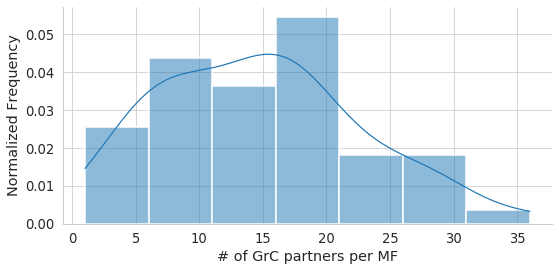

Height: 4, Aspect: 2


/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


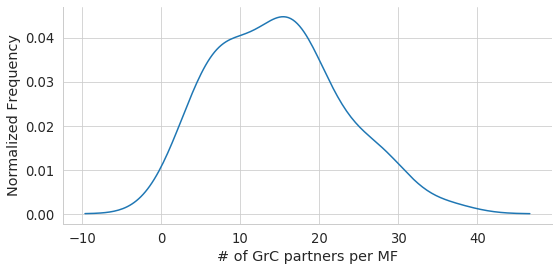

Height: 4, Aspect: 2


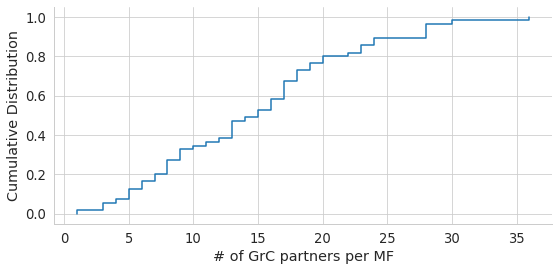

In [9]:

importlib.reload(my_plot); my_plot.my_displot(
    mpd,
    x='size',
    kind='hist',
    context='paper',
    kde=True,
    stat='density',
    height=4,
    aspect=2,
    x_axis_label='# of GrC partners per MF',
    y_axis_label='Normalized Frequency',
    save_filename=f'{script_n}_{z_min}_{z_max}_hist.svg',
    show=True,
    )

importlib.reload(my_plot); my_plot.my_displot(
    mpd,
    x='size',
    kind='kde',
    context='paper',
    # kde=True,
    height=4,
    aspect=2,
    x_axis_label='# of GrC partners per MF',
    y_axis_label='Normalized Frequency',
    save_filename=f'{script_n}_{z_min}_{z_max}_kde.svg',
    show=True,
    )

importlib.reload(my_plot); my_plot.my_displot(
    mpd,
    x='size',
    kind='ecdf',
    context='paper',
    # ecdf=True,
    height=4,
    aspect=2,
    y_axis_label='Cumulative Distribution',
    x_axis_label='# of GrC partners per MF',
    save_filename=f'{script_n}_{z_min}_{z_max}_ecdf.svg',
    show=True,
    )



Height: 4, Aspect: 0.75


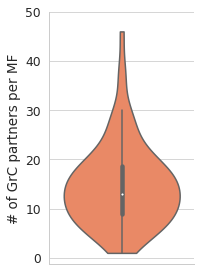

In [12]:

importlib.reload(my_plot); my_plot.my_catplot(
    mpd,
    # x="size",
    y="size",
    # hue="type",
    # hue_order=['All', 'Per PC', 'Per pf'],
    # hue_order=['All', 'Per PC'],
    ylim=[None, 50],
    context='paper',
    kind='violin',
    cut=0,
    # palette=sns.color_palette("mako_r", as_cmap=True),
    # palette=sns.color_palette("rocket"),
    color='coral',
    # font_scale=1.5,
    height=4,
    # width=2,
    aspect=.75,
    y_axis_label='# of GrC partners per MF',
    # x_axis_label='# of GrCs per MF',
    save_filename=f'{script_n}_{z_min}_{z_max}_violin.svg',
    show=True,
    )



In [21]:
import compress_pickle
# input_graph = compress_pickle.load('/n/groups/htem/Segmentation/shared-nondev/cb2_segmentation/analysis_mf_grc/mf_grc_model/input_graph_201114_restricted_z.gz')
input_graph = compress_pickle.load('/n/groups/htem/Segmentation/shared-nondev/cb2_segmentation/analysis_mf_grc/mf_grc_model/input_graph_201114.gz')
grcs = [k for k in input_graph.grcs.keys()]

for mf_id, mf in input_graph.mfs.items():
    for rosette_loc in mf.claws_gt:
        x, y, z = rosette_loc
        if x < 400000 or x > 480000:
            continue
        if z < z_min*1000 or z > z_max*1000:
            continue
        print(rosette_loc)
        print(mf_id)
        for grc_id in mf.claws[rosette_loc]:
            print(grc_id, end=', ')
#         print(mf.claws[rosette_loc])
        print('\n\n')
        

# rosette_loc_size

# # z_min = 15
# # z_max = 35
# z_min = 20
# z_max = 30
# mpd = MyPlotData()

# averages = []
# for rosette_loc, size in rosette_loc_size.items():
#     x, y, z = rosette_loc
#     if x < 360000 or x > 520000:
#         continue
#     if z < z_min*1000 or z > z_max*1000:
#         continue
#     averages.append(size)
#     mpd.add_data_point(
#         rosette_loc=rosette_loc,
#         size=size,
#         type='Rosette'
#         )


(479233, 426452, 21691)
mf_174
grc_1192, grc_1023, grc_892, grc_721, grc_1231, grc_1047, grc_863, grc_1055, grc_875, grc_687, grc_853, grc_449, grc_606, grc_1565, grc_1176, grc_982, grc_1497, 


(477579, 418414, 28917)
mf_164
grc_1192, grc_837, grc_1190, grc_1060, grc_1193, grc_1107, grc_976, grc_1096, grc_1172, grc_1020, grc_1008, grc_1180, grc_1157, grc_1035, grc_1093, grc_1356, grc_1355, grc_1086, grc_1033, grc_1495, grc_972, grc_1347, grc_1081, grc_208, grc_1038, grc_1168, grc_1352, grc_1209, 


(405115, 458170, 27611)
mf_322
grc_1324, grc_1304, grc_1024, grc_1265, grc_212, grc_214, grc_16, grc_17, grc_1260, grc_1326, grc_1071, grc_1303, grc_1286, grc_1090, grc_1082, grc_20, grc_1219, 


(456407, 465805, 22030)
mf_181
grc_1170, grc_719, grc_1293, grc_858, grc_1060, grc_1049, grc_943, grc_1200, grc_1167, grc_781, grc_1129, grc_1272, grc_1140, grc_967, grc_1282, grc_779, grc_1178, grc_1010, grc_118, grc_777, grc_958, grc_1127, grc_1133, 


(465270, 445558, 22384)
mf_162
grc_878, grc_